170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
782/782 [==============================] - 70s 85ms/step - loss: 1.5871 - accuracy: 0.4181 - val_loss: 1.3286 - val_accuracy: 0.5206
Epoch 2/10
782/782 [==============================] - 66s 84ms/step - loss: 1.2291 - accuracy: 0.5617 - val_loss: 1.1363 - val_accuracy: 0.5992
Epoch 3/10
782/782 [==============================] - 71s 91ms/step - loss: 1.0625 - accuracy: 0.6259 - val_loss: 1.0961 - val_accuracy: 0.6165
Epoch 4/10
782/782 [==============================] - 67s 86ms/step - loss: 0.9640 - accuracy: 0.6624 - val_loss: 1.0091 - val_accuracy: 0.6440
Epoch 5/10
782/782 [==============================] - 68s 87ms/step - loss: 0.8856 - accuracy: 0.6908 - val_loss: 0.9425 - val_accuracy: 0.6746
Epoch 6/10
782/782 [==============================] - 70s 90ms/step - loss: 0.8243 - accuracy: 0.7113 - val_loss: 0.9288 - val_accuracy: 0.6806
Epoch 7/10
782/782 [==============================] - 68s 88ms/step -

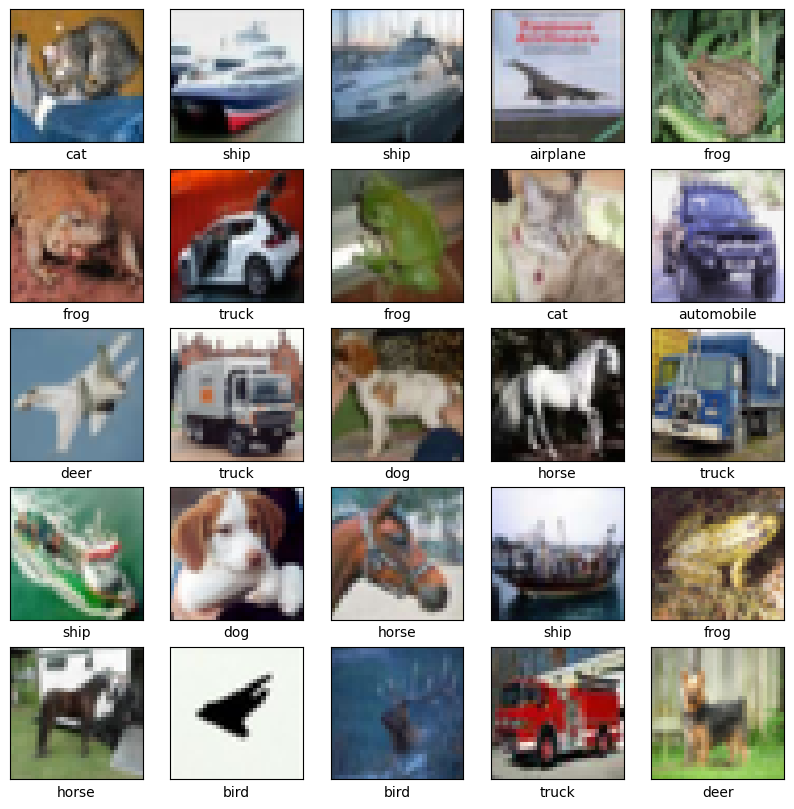

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CIFAR-10 label names
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define the CNN model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Display sample images along with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    predicted_label = np.argmax(model.predict(np.expand_dims(x_test[i], axis=0)))
    plt.xlabel(cifar10_labels[predicted_label])
plt.show()
